In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

In [11]:
dataframe=pd.read_csv('profit.csv')
dataframe

,Sold,Profit
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


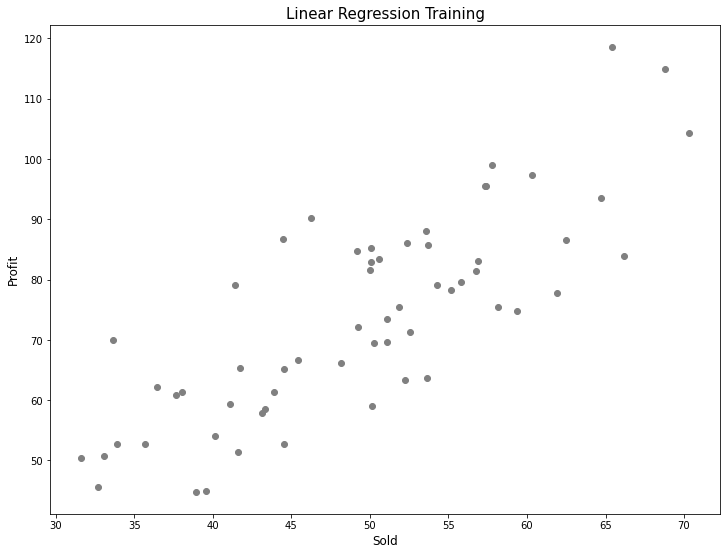

In [12]:
feature_X=dataframe['Sold'].values
actual_Y=dataframe['Profit'].values

X_train,X_test,Y_train,Y_test=train_test_split(feature_X,actual_Y,test_size=0.4,shuffle=True)

plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.scatter(X_train,Y_train,color='gray')
plt.title('Linear Regression Training', fontSize=15)
plt.xlabel('Sold', fontSize=12)
plt.ylabel('Profit', fontSize=12)
plt.show()

In [13]:
m=20
c=10
learning_rate=0.00001
epoch=10000
n=len(X_train)

In [14]:
for i in range(epoch):   #Training phase
    pred_Y=m*X_train+c
    
    derivative_m=(2/n)*sum((pred_Y-Y_train)*X_train)
    derivative_c=(2/n)*sum(pred_Y-Y_train)
    
    m=m-(learning_rate*derivative_m)
    c=c-(learning_rate*derivative_c)

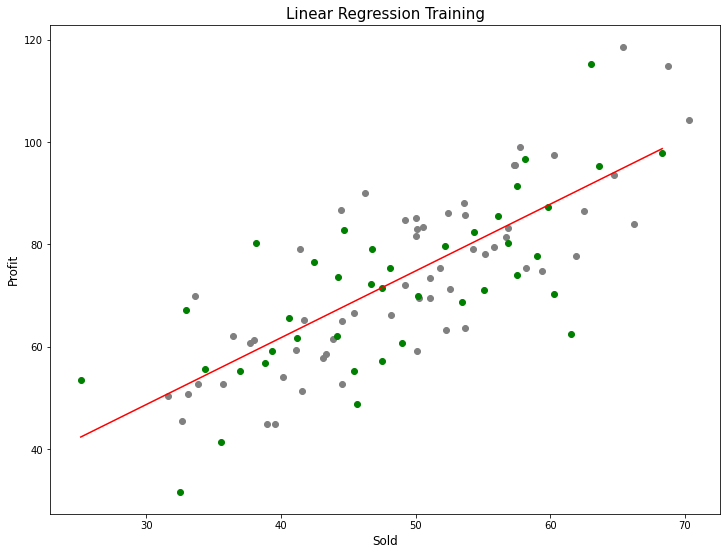

In [15]:
final_pred_Y=m*X_test+c

plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.scatter(X_train,Y_train,color='gray')
plt.scatter(X_test,Y_test,color='green')
plt.plot([min(X_test),max(X_test)],[min(final_pred_Y),max(final_pred_Y)],color='RED')
plt.title('Linear Regression Training', fontSize=15)
plt.xlabel('Sold', fontSize=12)
plt.ylabel('Profit', fontSize=12)
plt.show()

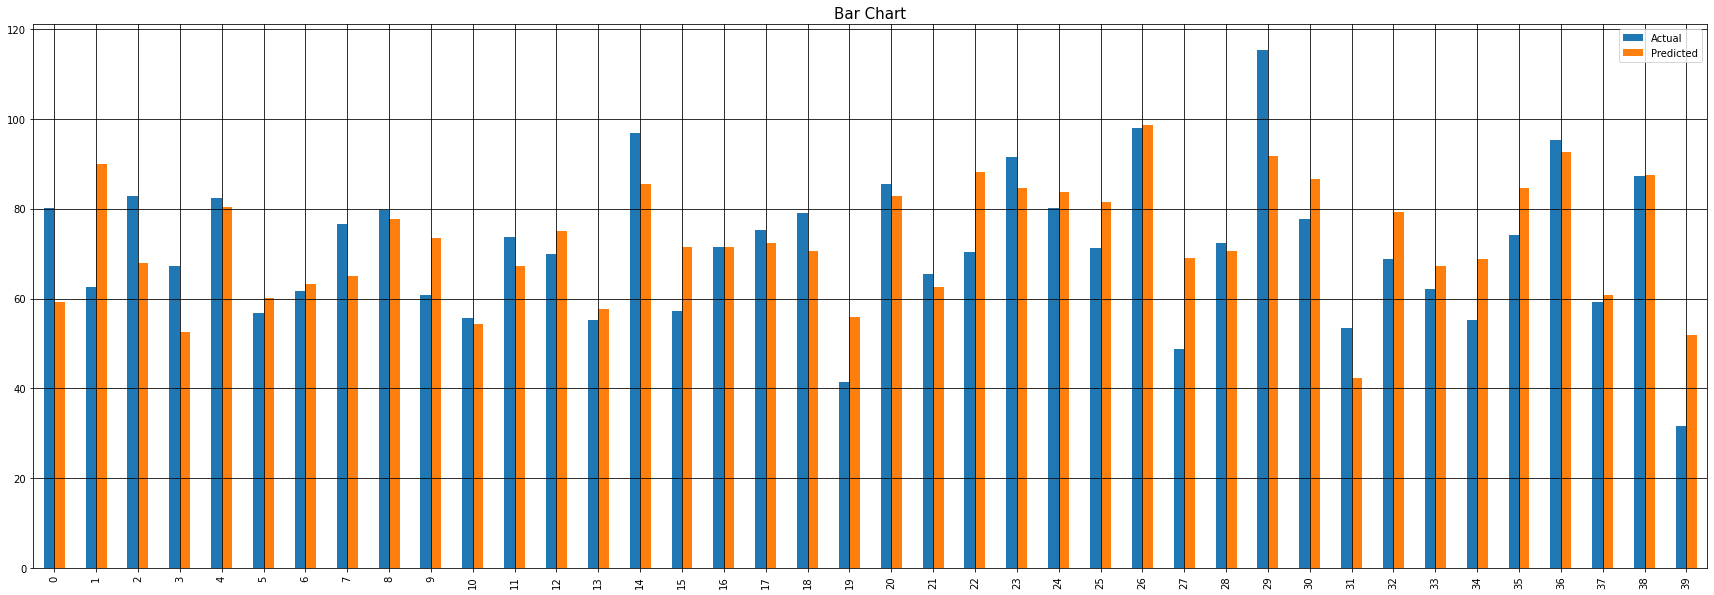

In [16]:
plt.rcParams['figure.figsize'] = (30.0, 10.0)
dataframe=pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': final_pred_Y.flatten()})
dataframe.plot(kind='bar')
plt.grid(which='major',color='black')
plt.grid(which='minor',color='green')
plt.title('Bar Chart', fontSize=15)
plt.show()

In [17]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:   ',metrics.mean_absolute_error(Y_test,final_pred_Y))
print('Mean Squared Error:   ',metrics.mean_squared_error(Y_test,final_pred_Y))
print('Root Mean Squared Error:   ',np.sqrt(metrics.mean_squared_error(Y_test,final_pred_Y)))

Mean Absolute Error:    8.847581914289249
Mean Squared Error:    129.2106100714501
Root Mean Squared Error:    11.367084501817082
